In [421]:
# generate future y values using past y values 

In [1]:
import pandas as pd
import numpy as np
import os
import shutil
import openpyxl
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as plt
import re

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler


from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline

from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

from sklearn.metrics import mean_squared_error, mean_absolute_error



from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM


import pickle


In [2]:

def convert_to_dataframe(x):
    return pd.DataFrame(x)


In [3]:
def create_sequences(features, target, seq_length):
    X, y = [], []
    for i in range(len(features) - seq_length):
        X.append(features[i:i + seq_length])
        y.append(target[i + seq_length])
    return np.array(X), np.array(y)




In [15]:
def predict_future(model, data, seq_length, future_steps):
    future_predictions = []
    current_sequence = data[-seq_length:].reshape(1, seq_length, data.shape[1])
    
    return(current_sequence)

In [4]:
df = pd.read_csv(r'C:\Users\whiter04\OneDrive - Johnson Matthey\00. cspark\ELY\ELY-TimeSeries\Data\master_data_frame.csv')
df_copy = df.copy()
df_copy = df_copy.drop('Unnamed: 0',axis=1) 
df_copy


to_drop = ['temp_anode_inlet_set', 'temp_cathode_inlet_set', 'pressure_anode_set',
           'pressure_cathode_set', 'flow_anode_di_water_supply_set', 'flow_cathode_di_water_supply_set', 
          'flow_cathode_di_water_supply', 'signal_in_o2_in_h2_sensor']

df_copy = df_copy.drop(to_drop, axis=1)
df_copy


df_copy['seconds'] = (df_copy['time_running_total']/1000).astype(int)
df_copy['minutes'] = (df_copy['seconds']/60).astype(int)

# df_copy['hours'] = (df_copy['minutes']/60).astype(int)
# df_copy['days'] = (df_copy['hours']/24).astype(int)
# df_copy['weeks'] = (df_copy['days']/7).astype(int)
df_copy = df_copy.drop('time_running_total',axis=1)

# df_copy = df_copy.tail(150000)
df_copy

,cell_voltage_001,current,current_density,temp_anode_inlet,temp_anode_outlet,temp_cathode_inlet,temp_cathode_outlet,pressure_anode_inlet,pressure_anode_outlet,pressure_cathode_inlet,pressure_cathode_outlet,flow_anode_di_water_supply,signal_in_resistivity_anode,signal_in_resistivity_cathode,signal_in_h2_in_o2_sensor,seconds,minutes
0,-0.095167,-0.01262,-0.000505,22.524658,22.211363,22.943993,22.664978,0.015911,-0.026205,-0.009285,-0.009439,0.149858,0.142337,0.580925,0.278146,0,0
1,-0.095167,-0.01262,-0.000505,22.524658,22.211363,22.943993,22.664978,0.015911,-0.026205,-0.009285,-0.009439,0.149858,0.142337,0.580925,0.278146,0,0
2,-0.095167,-0.01262,-0.000505,22.524658,22.211363,22.943993,22.664978,0.015911,-0.026205,-0.009285,-0.009439,0.149858,0.142337,0.580925,0.278146,0,0
3,-0.095167,-0.01192,-0.000477,23.574999,22.622944,22.930300,22.651320,0.184089,-0.026205,-0.009285,-0.001021,0.270174,0.132591,0.585798,0.276583,30,0
4,-0.095167,-0.01192,-0.000477,23.574999,22.622944,22.930300,22.651320,0.184089,-0.026205,-0.009285,-0.001021,0.270174,0.132591,0.585798,0.276583,30,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
461237,1.879790,75.00482,3.000193,79.819145,78.329117,29.627552,34.574463,1.992006,1.723834,6.002450,6.019177,0.300858,0.230055,0.152083,0.104703,4934550,82242
461238,1.879790,75.00482,3.000193,79.819145,78.329117,29.627552,34.574463,1.992006,1.723834,6.002450,6.019177,0.300858,0.230055,0.152083,0.104703,4934550,82242
461239,1.880171,75.00482,2.999912,79.819145,78.354111,29.627552,34.560806,1.992006,1.723834,6.002450,5.960248,0.300858,0.215435,0.156957,0.103140,4934580,82243
461240,1.880171,75.00482,2.999912,79.819145,78.354111,29.627552,34.560806,1.992006,1.723834,6.002450,5.960248,0.300858,0.215435,0.156957,0.103140,4934580,82243


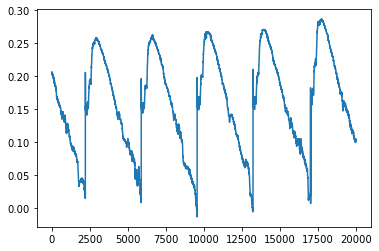

,cell_voltage_001,current,signal_in_h2_in_o2_sensor
minutes,,,
2024-06-28 05:22:00,1.869836,75.000614,0.206269
2024-06-28 05:23:00,1.870217,74.997810,0.206269
2024-06-28 05:24:00,1.870637,74.995006,0.206269
2024-06-28 05:25:00,1.870370,74.997810,0.206269
2024-06-28 05:26:00,1.870332,75.009026,0.206269
...,...,...,...
2024-07-12 02:39:00,1.879218,74.993604,0.101265
2024-07-12 02:40:00,1.879294,75.000614,0.103140
2024-07-12 02:41:00,1.879599,74.996408,0.103140


In [5]:
import matplotlib.pyplot as plt

time_period = 'minutes'

df_time = df_copy.groupby(time_period).mean().reset_index()

downsampled_df = df_time.tail(20000).reset_index()

downsampled_df = downsampled_df[['minutes','cell_voltage_001','current','signal_in_h2_in_o2_sensor']]

downsampled_df[time_period] = pd.to_datetime('2024-05-16 00:00:00') + pd.to_timedelta(downsampled_df[time_period], unit='m')



plt.plot(downsampled_df['signal_in_h2_in_o2_sensor'])

plt.show()

downsampled_df = downsampled_df.set_index('minutes')
downsampled_df

In [6]:

pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    # Add more preprocessing steps as needed
])

# Fit and transform the data


features = downsampled_df.drop(columns= ['signal_in_h2_in_o2_sensor'])
target = downsampled_df['signal_in_h2_in_o2_sensor']


features_trans = pipeline.fit_transform(features)
target_trans = pipeline.fit_transform(pd.DataFrame(target))



seq_length = 1440  # Using one day (1440 minutes) to predict the next minute
X, y = create_sequences(features_trans, target_trans, seq_length)

In [7]:


train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]



In [9]:
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    LSTM(50),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1440, 50)          10600     
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 30851 (120.51 KB)
Trainable params: 30851 (120.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
model.fit(X_train, y_train, epochs=3, batch_size=1, verbose=1)

with open('model_2.pkl', 'wb') as file:
    pickle.dump(model, file)


Epoch 1/3
14848/14848 [==============================] - 8428s 568ms/step - loss: 0.0603
Epoch 2/3
14848/14848 [==============================] - 33984s 2s/step - loss: 0.0506
Epoch 3/3
14848/14848 [==============================] - 10071s 678ms/step - loss: 0.0510


In [16]:
loss = model.evaluate(X_test, y_test)
loss

116/116 [==============================] - 34s 275ms/step - loss: 0.0660


0.06595102697610855

In [36]:
predictions = model.predict(X_test)
predictions

116/116 [==============================] - 33s 287ms/step


array([[0.6210932 ],
       [0.62109256],
       [0.6210941 ],
       ...,
       [0.6210802 ],
       [0.62107974],
       [0.62107605]], dtype=float32)

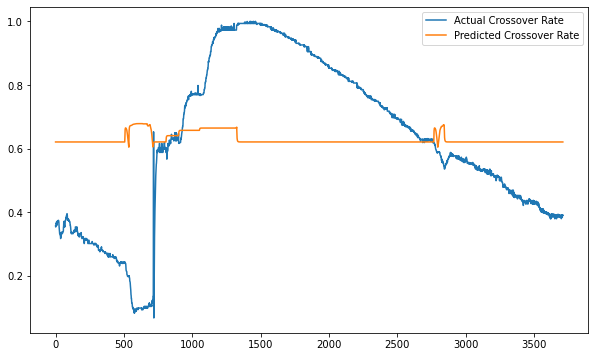

In [37]:
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Crossover Rate')
plt.plot(predictions, label='Predicted Crossover Rate')
plt.legend()
plt.show()

In [38]:
predictions_train = model.predict(X_train)
predictions_train

464/464 [==============================] - 177s 382ms/step


array([[0.62117624],
       [0.6211775 ],
       [0.62117773],
       ...,
       [0.62110054],
       [0.6210974 ],
       [0.6210937 ]], dtype=float32)

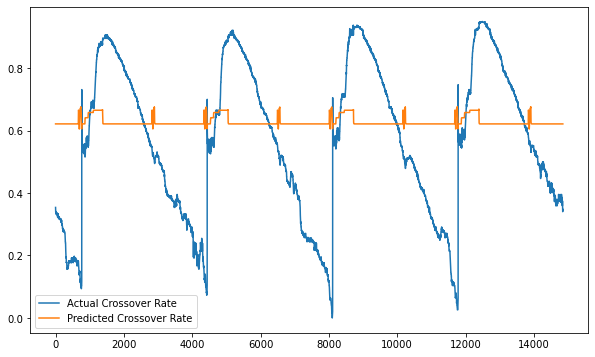

In [39]:
plt.figure(figsize=(10, 6))
plt.plot(y_train, label='Actual Crossover Rate')
plt.plot(predictions_train, label='Predicted Crossover Rate')
plt.legend()
plt.show()